# Part 2: Introducing NetworkX

Throughout this tutorial we will use the NetworkX python package, so now is a good time to import it.

In [1]:
import networkx as nx

We'll be working with version 1.11 of the package, which is the latest stable version.

In [2]:
nx.__version__

'1.11'

## 2.1: Building a graph

One way to work with a graph using NetworkX is to construct one from scratch. Let's initialize an empty graph:

In [3]:
g = nx.Graph()

We can now grow it by adding edges manually.

In [4]:
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1.0)
g.add_edge('c', 'd', weight=2.2) 

Nodes corresponding to the endpoints of the edges you add are automatically added to the graph. Any python object can be a node in the graph.

You can also add nodes instead of edges:

In [5]:
g.add_node('e')

## 2.2: Plotting graphs

Like many python packages, NetworkX uses the popular matplotlib package to plot graphs. To have these graphs displayed natively inside our Jupyter notebook, we need to use the following IPython magic command:

In [6]:
%matplotlib inline

We can now display our simple graph using NetworkX's `draw()` function:

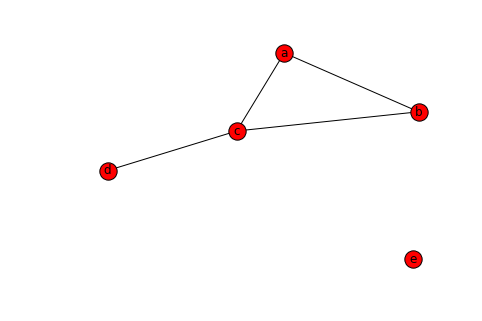

In [7]:
nx.draw(g, with_labels=True)

If we also want to display the edge weights in our weighted graph, we'll have to work a bit harder.

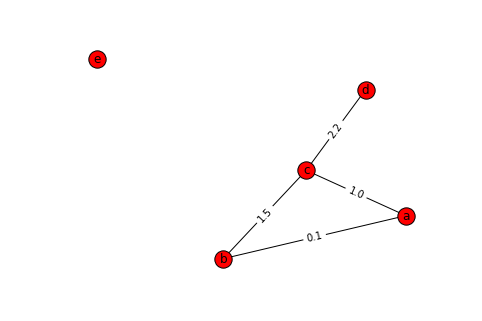

In [8]:
pos = nx.spring_layout(g) #this will create a common layout for nodes; a dict mapping each node to a position
nx.draw(g, pos, with_labels=True) #we can now draw the same graph using these specific positions for nodes
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,'weight')); #and add edge labels using the same positions

## 2.3: Basic algorithms

NetworkX includes implementations of many common graph and network-related algorithms. One of them is the renowned Dijkstra’s algorithm for finding the shortest path between two nodes in a graph.

In [9]:
nx.shortest_path(g, source='b', target='d')

['b', 'c', 'd']

If no path exists, a NetworkXNoPath error will be thrown.

In [10]:
from networkx import NetworkXNoPath
try:
    print(nx.shortest_path(g, source='b', target='e'))
except NetworkXNoPath:
    print('No path between node b and e.')

No path between node b and e.


We can also have the algorithm consider edge weights by telling it which edge attribute to treat as weight:

In [11]:
nx.shortest_path(g, 'b', 'd', weight='weight')

['b', 'a', 'c', 'd']

If you do not specify the target, you'll get a dict keyed by all possible targets - all other nodes in the graph - each mapping to the shortest path from the given source node to that target (if such a path exists):

In [12]:
nx.shortest_path(g, 'b')

{'a': ['b', 'a'], 'b': ['b'], 'c': ['b', 'c'], 'd': ['b', 'c', 'd']}

The same goes for leaving out the source. Note that these two operations have different results - besides the order of nodes in the paths - only in directed graphs.

In [13]:
nx.shortest_path(g, target='b')

{'a': ['a', 'b'], 'b': ['b'], 'c': ['c', 'b'], 'd': ['d', 'c', 'b']}

Leaving out both the source in the target will yield all pair-wise shortest paths in the graph:

In [14]:
nx.shortest_path(g)

{'a': {'a': ['a'], 'b': ['a', 'b'], 'c': ['a', 'c'], 'd': ['a', 'c', 'd']},
 'b': {'a': ['b', 'a'], 'b': ['b'], 'c': ['b', 'c'], 'd': ['b', 'c', 'd']},
 'c': {'a': ['c', 'a'], 'b': ['c', 'b'], 'c': ['c'], 'd': ['c', 'd']},
 'd': {'a': ['d', 'c', 'a'],
  'b': ['d', 'c', 'b'],
  'c': ['d', 'c'],
  'd': ['d']},
 'e': {'e': ['e']}}